# Dataset modeling for Financial Time Series Data
This document aims to provide information on the research related to find the best format to represent financial time series data with certain data analysis for the usage of machine learning techniques

## On the data provided - Overview

,open,high,low,close,adj close,volume
Date,,,,,,
2010-01-04,1.6930,1.7412,1.6723,1.7190,1.7190,0.0
2010-01-05,1.6713,1.7370,1.6713,1.7370,1.7370,0.0
2010-01-06,1.6798,1.7359,1.6798,1.7315,1.7315,0.0
2010-01-07,1.7242,1.7472,1.6805,1.7389,1.7389,0.0
2010-01-08,1.6954,1.7492,1.6954,1.7320,1.7320,0.0


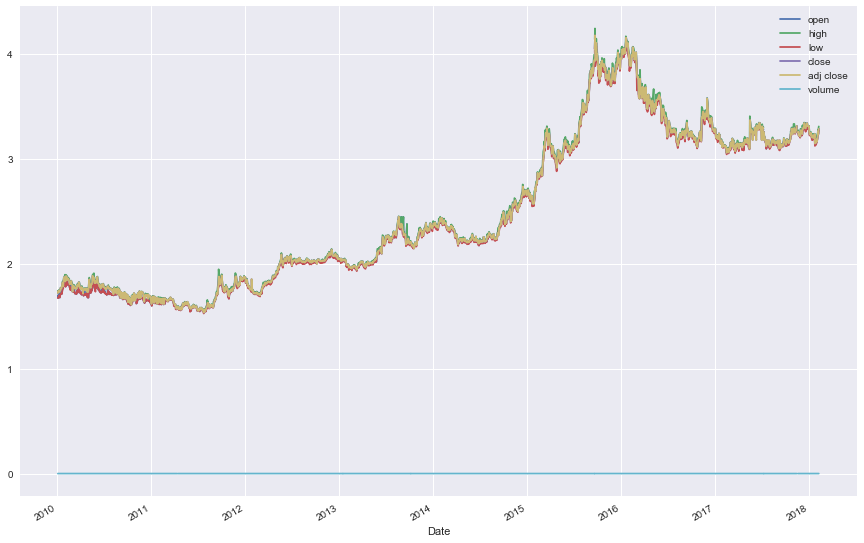

In [1]:
%matplotlib inline

import pandas as pd
import pandas_datareader as web
from IPython.core.display import display
import matplotlib.pylab as plt
from stockstats import StockDataFrame
import seaborn as sns
sns.set()

df = web.DataReader('BRL=X', 'yahoo')
data = pd.DataFrame(df)
data = StockDataFrame.retype(data)
display(data.head())
data.plot(figsize=(15,10))

## On the indicators

In [1]:
%matplotlib inline

import pandas as pd
import pandas_datareader as web
from IPython.core.display import display
import matplotlib.pylab as plt
from stockstats import StockDataFrame
import seaborn as sns
sns.set()

data = pd.read_csv('USDBRL/all_indicators.csv')
data = StockDataFrame.retype(data)
copy = data.copy()
display(data.tail())

,open,high,low,close,adj close,volume,close_20_sma,close_20_mstd,boll,boll_ub,...,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.1947,0.0,3.25131,0.045347,3.25131,3.342003,...,32.424464,32.424464,50.393826,50.393826,44.705562,44.705562,46.145262,46.145262,-0.104079,-0.070007
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.2007,0.0,3.24457,0.042074,3.24457,3.328719,...,27.456171,27.456171,12.093108,12.093108,35.387718,35.387718,43.071678,43.071678,-0.108291,-0.079818
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.2355,0.0,3.24086,0.039202,3.24086,3.319265,...,31.174430,31.174430,28.154808,28.154808,33.321172,33.321172,40.285819,40.285819,-0.107148,-0.087835
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.1451,0.0,3.23245,0.040851,3.23245,3.314153,...,41.194580,41.194580,52.070509,52.070509,38.678126,38.678126,39.826478,39.826478,-0.112533,-0.094800
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.1469,0.0,3.22424,0.040712,3.22424,3.305665,...,36.821796,36.821796,45.967524,45.967524,40.760811,40.760811,40.093430,40.093430,-0.120949,-0.101018


## Handling missing data (Data Cleaning)

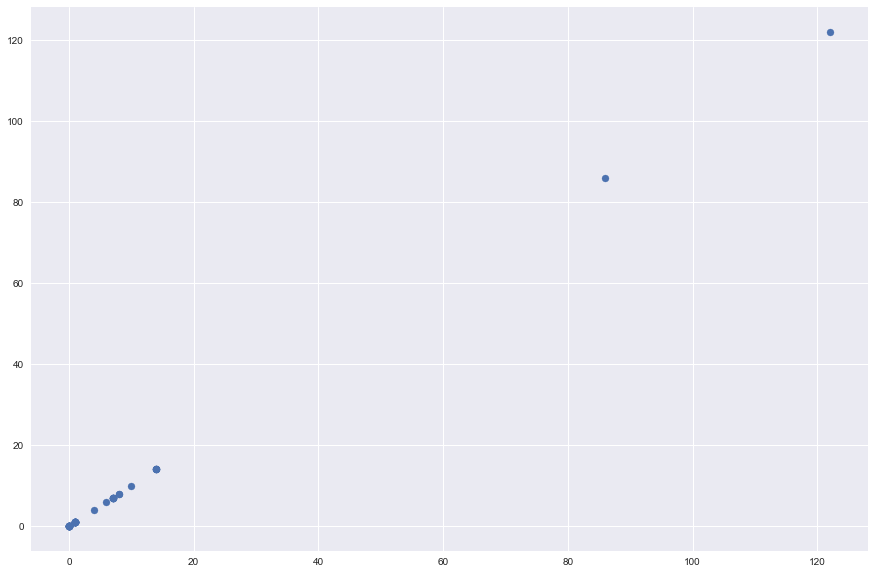

In [2]:
#How much of the data is missing
counter_nan = data.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
plt.scatter(counter_nan, counter_nan.values)
plt.show()

In [3]:
#how many columns does not have a single nan
counter_without_nan = counter_nan[counter_nan==0]
print " [+] Number of columns that does not have a nan: " + str(len(counter_without_nan))
print " [+] Number of total columns: " + str(len(data.columns))

 [+] Number of columns that does not have a nan: 24
 [+] Number of total columns: 69


###### Much of the encountered NaN are caused from the indicators necessity for previous data

In [4]:
display(data[counter_nan.keys()].head())

,cci_20,cci,tr,high_delta,um,low_delta,dm,close_-1_d,cr-ma3,close_-1_s,...,kdjk_9,close_10_sma,macds,close_50_sma,dma,pdm,pdm_14_ema,pdm_14,macdh,macd
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.926463,1.719000,0.000000,1.719000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000
2010-01-05,66.666667,66.666667,0.0657,-0.0042,0.0000,-0.0010,0.001,0.0180,NaN,1.7190,...,68.614781,1.728000,0.000224,1.728000,0.0,0.0000,0.000000,0.000000,0.000359,0.000404
2010-01-06,60.363636,60.363636,0.0572,-0.0011,0.0000,0.0085,0.000,-0.0055,NaN,1.7370,...,74.450865,1.729167,0.000273,1.729167,0.0,0.0000,0.000000,0.000000,0.000141,0.000344
2010-01-07,133.333333,133.333333,0.0667,0.0113,0.0113,0.0007,0.000,0.0074,NaN,1.7315,...,79.322096,1.731600,0.000376,1.731600,0.0,0.0113,0.003457,0.003457,0.000400,0.000576
2010-01-08,106.533036,106.533036,0.0538,0.0020,0.0020,0.0149,0.000,-0.0069,NaN,1.7389,...,78.854868,1.731680,0.000387,1.731680,0.0,0.0020,0.003077,0.003077,0.000055,0.000415


###### Erasing equal or all zero columns

In [5]:
from pandas.util.testing import assert_series_equal
import numpy as np

# Taking out columns that have all values as 0 or equal values
data = StockDataFrame.retype(data)
cols = data.select_dtypes([np.number]).columns
diff = data[cols].diff().sum()

data = data.drop(diff[diff==0].index, axis=1)
data = data.drop('adj close', 1)
display(data.tail())


,open,high,low,close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_-1_s,...,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.25131,0.045347,3.25131,3.342003,3.160617,3.2051,...,32.424464,32.424464,50.393826,50.393826,44.705562,44.705562,46.145262,46.145262,-0.104079,-0.070007
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.24457,0.042074,3.24457,3.328719,3.160421,3.1947,...,27.456171,27.456171,12.093108,12.093108,35.387718,35.387718,43.071678,43.071678,-0.108291,-0.079818
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.24086,0.039202,3.24086,3.319265,3.162455,3.2007,...,31.174430,31.174430,28.154808,28.154808,33.321172,33.321172,40.285819,40.285819,-0.107148,-0.087835
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.23245,0.040851,3.23245,3.314153,3.150747,3.2355,...,41.194580,41.194580,52.070509,52.070509,38.678126,38.678126,39.826478,39.826478,-0.112533,-0.094800
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.22424,0.040712,3.22424,3.305665,3.142815,3.1451,...,36.821796,36.821796,45.967524,45.967524,40.760811,40.760811,40.093430,40.093430,-0.120949,-0.101018


###### Slicing the index gives us a pretty simple solution with minimum data miss for the indicator necessity on previous data



,cci_20,cci,low_delta,um,high_delta,tr,close_-1_d,dm,wr_6,open,...,mdm_14,mdi_14,trix,kdjj,kdjj_9,kdjd,kdjd_9,kdjk,kdjk_9,trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2010-01-22,178.996300,176.807799,0.0130,0.0269,0.0269,0.0776,0.0180,0.0000,9.292763,1.7525,...,0.001941,3.085113,0.143416,97.528377,97.528377,92.856768,92.856768,94.413971,94.413971,0.083942
2010-01-25,128.966672,124.296506,0.0130,0.0000,-0.0088,0.0558,-0.0353,0.0000,38.800999,1.8189,...,0.001653,2.659399,0.155344,73.827148,73.827148,90.138251,90.138251,84.701217,84.701217,0.096051
2010-01-26,197.350586,184.521032,0.0474,0.0247,0.0247,0.0625,0.0501,0.0000,9.117647,1.8136,...,0.001411,2.269388,0.172968,82.362163,82.362163,89.027382,89.027382,86.805642,86.805642,0.110112
2010-01-27,170.239369,148.954115,-0.0269,0.0203,0.0203,0.0803,0.0160,0.0269,11.533149,1.7860,...,0.005090,7.953166,0.195355,85.874366,85.874366,88.576951,88.576951,87.676089,87.676089,0.125540
2010-01-28,166.319888,142.587103,0.0204,0.0049,0.0049,0.0648,0.0184,0.0000,2.429765,1.8064,...,0.004363,6.809581,0.222101,94.516229,94.516229,89.425419,89.425419,91.122356,91.122356,0.142624


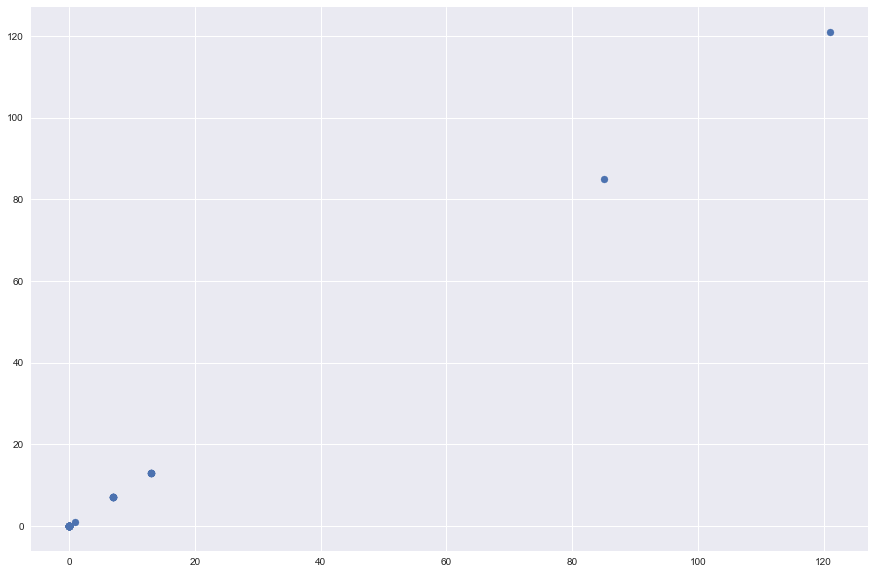

 [+] Number of columns that does not have a nan: 66
 [+] Number of total columns: 66


In [6]:
data = data[14:-14]
counter_nan = data.isnull().sum().sort_values(ascending=False)
display(data[counter_nan.keys()].head())
plt.figure(figsize=(15,10))
plt.scatter(counter_nan, counter_nan.values)
plt.show()
print " [+] Number of columns that does not have a nan: " + str(len(counter_nan))
print " [+] Number of total columns: " + str(len(data.columns))

###### After slicing we can backfill NaN values for holidays and exceptional days on the market

In [7]:
#Back filling for holidays and exceptional days on the market
data = data.fillna(method='bfill')
data = data[1:-1]
counter_without_nan = data.isnull().sum().sort_values(ascending=False)
print " [+] Number of columns that does not have a nan: " + str(len(counter_without_nan))
print " [+] Number of total columns: " + str(len(data.columns))

 [+] Number of columns that does not have a nan: 66
 [+] Number of total columns: 66


## Data Exploring

In [8]:
def plot_histogram(x):
    plt.figure(figsize=(15,10))
    plt.hist(x,  alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

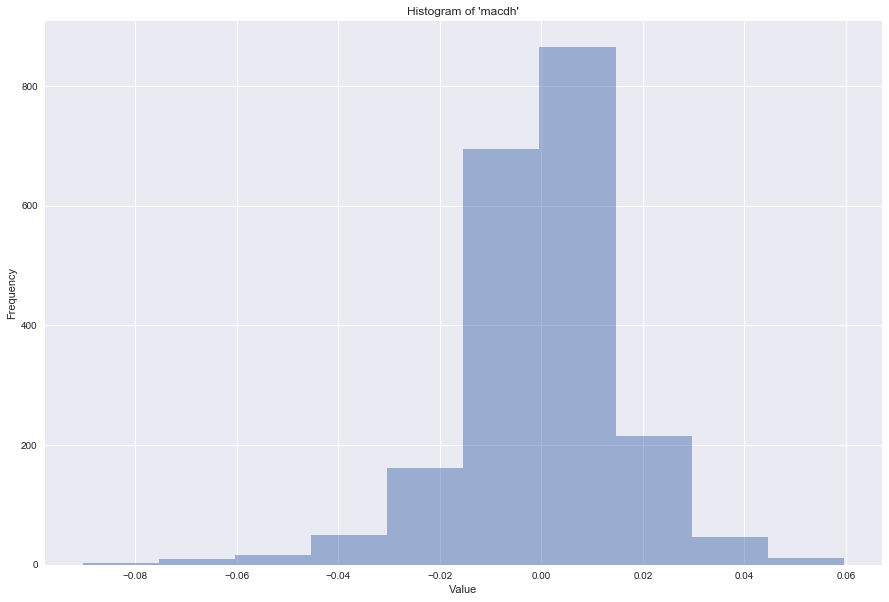

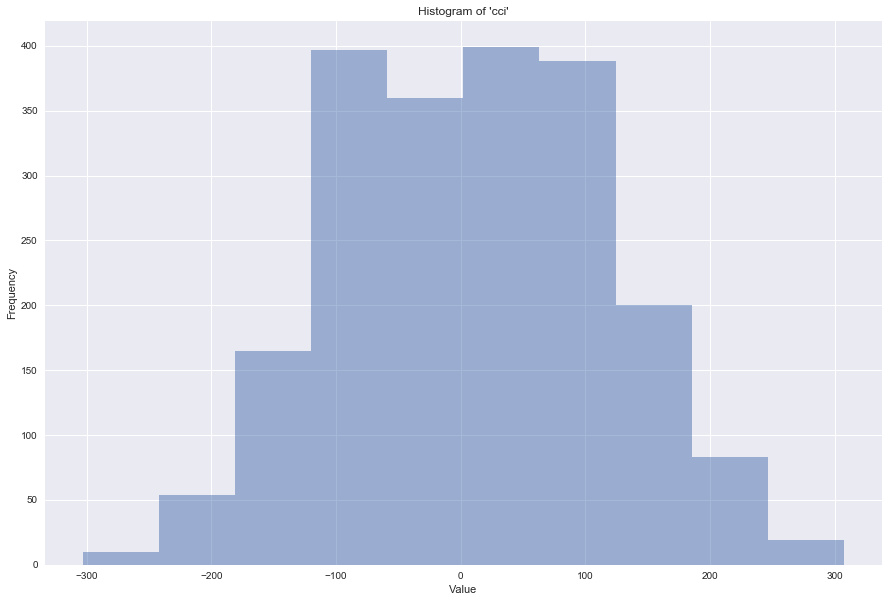

In [9]:
plot_histogram(data['macdh'])
plot_histogram(data['cci'])

###### Exploring the distribution of percentage change in the close value

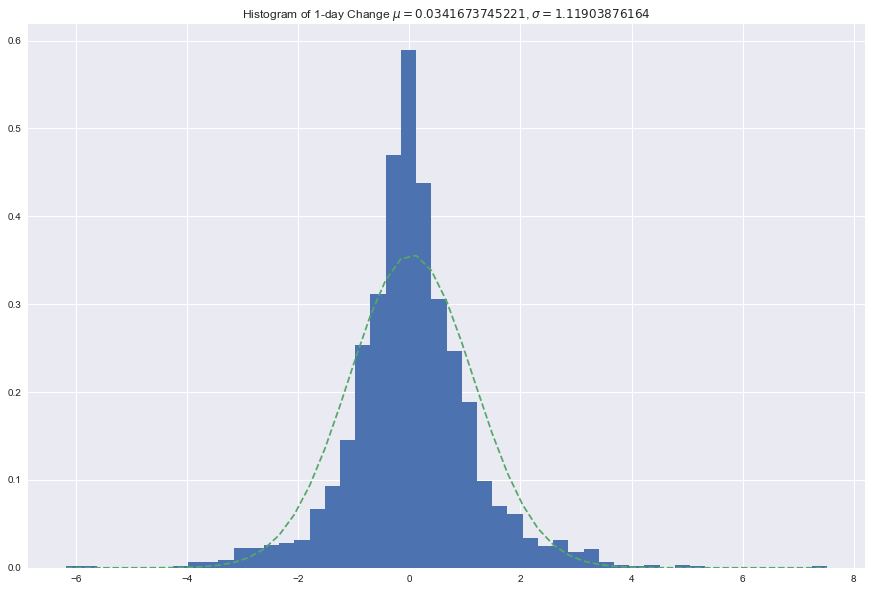

In [10]:
import matplotlib.mlab as mlab

mu = data['close_-1_r'].mean()
sigma = data['close_-1_r'].std()
x = data['close_-1_r']
num_bins = 50
fig, ax = plt.subplots(figsize=(15,10))
n, bins, patches = ax.hist(x, num_bins, normed=1)
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_title('Histogram of 1-day Change $\mu=' + str(mu) + '$, $\sigma=' + str(sigma) + '$')
plt.show()

###### Making our first label of 1 day future forecast for feature exploration

In [ ]:
label_display = pd.DataFrame()
label_display['close'] = data['close']
label_display['from_yesterday_rate'] = data['close_-1_r']
y1 = data['close_-1_r'].shift(-1)
y1 = y1.apply(lambda x:1 if x>0.0000 else 0)
label_display['y'] = y1
label_display['c1'] = c1
display(label_display.head(7))


###### Exploring influence of feature on outcome target

In [12]:
def plot_histogram_dv(x,y):
    plt.figure(figsize=(15,10))
    plt.hist(list(x[y==0]), alpha=0.5, label='Bear')
    plt.hist(list(x[y==1]), alpha=0.5, label='Bull')
    plt.title("Histogram of '{var_name}' by Forecast Target".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

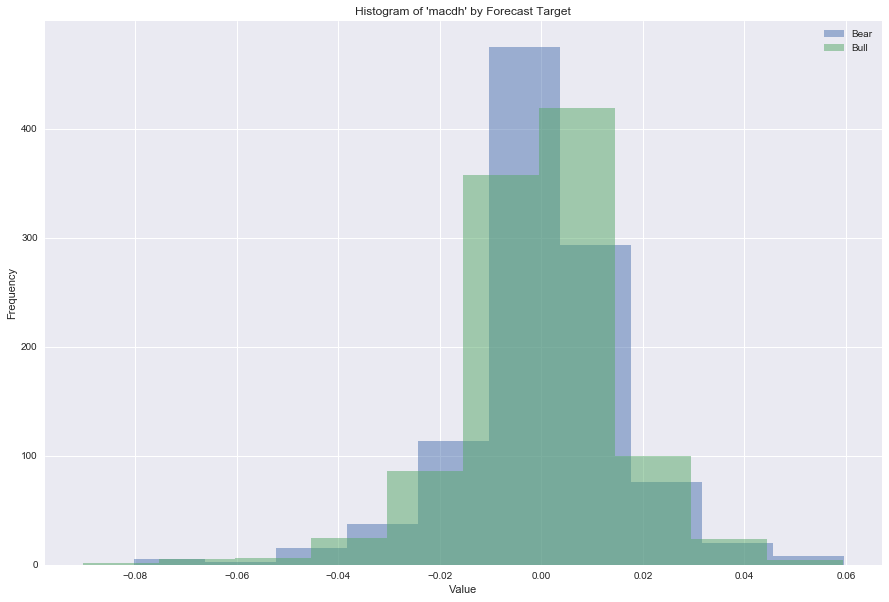

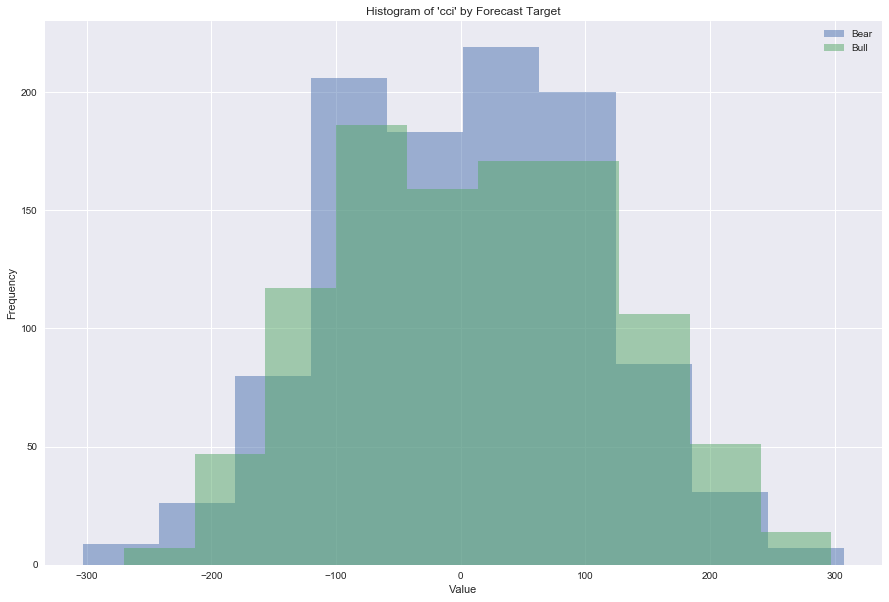

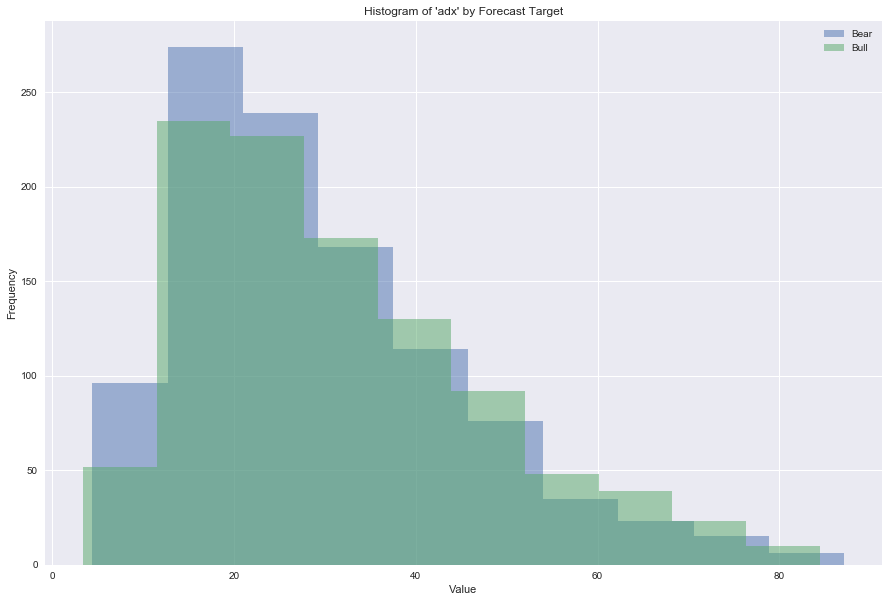

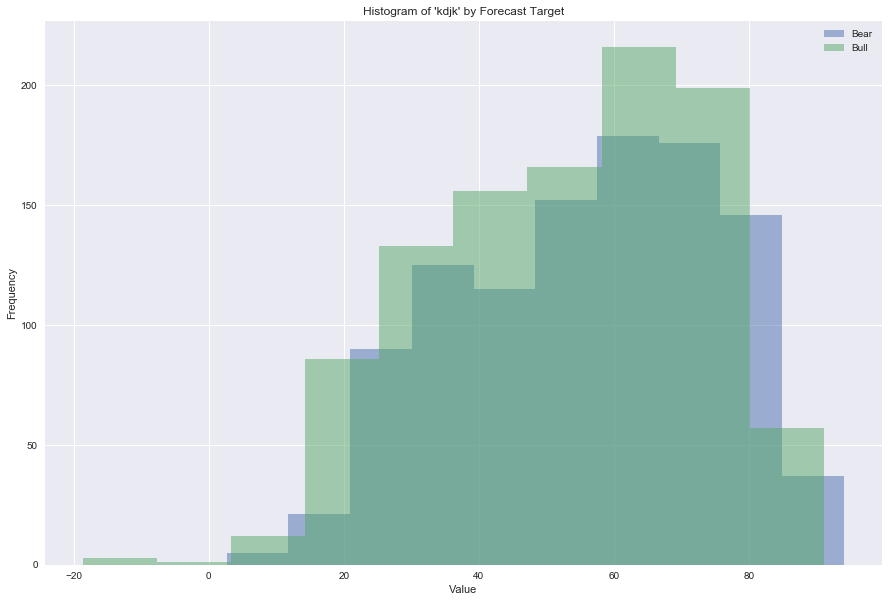

In [13]:
plot_histogram_dv(data['macdh'], y1)
plot_histogram_dv(data['cci'], y1)
plot_histogram_dv(data['adx'], y1)
plot_histogram_dv(data['kdjk'], y1)

## Feature Engineering

###### Normalizing and Standardizing distributions
Different techniques to represent a price movement can be used to select the one with best results

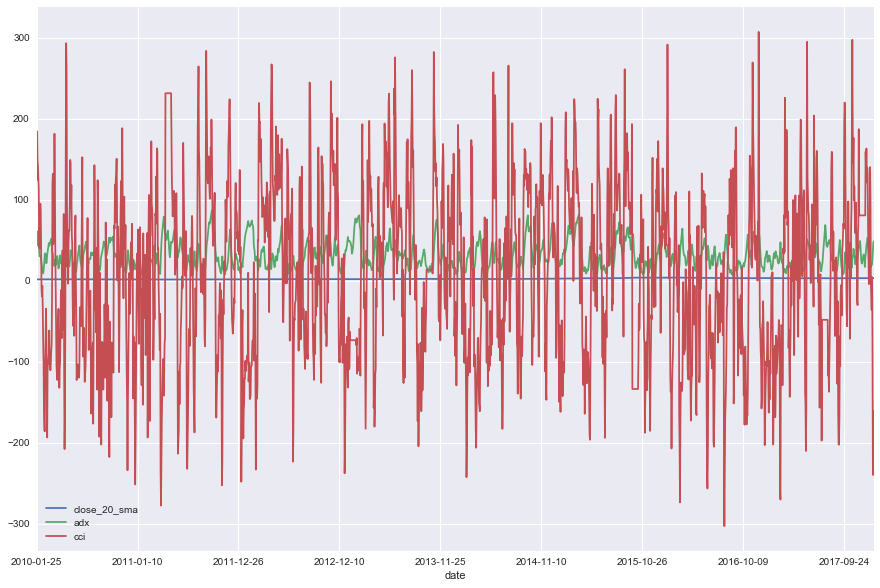

In [14]:
data.plot(x=data.index, y=['close_20_sma','adx', 'cci'], figsize=(15, 10))


#### As shown above, different indicators have different metrics, so we need to normalize in various ways and search for the best results 

###### First let's explore the behavior of each target label

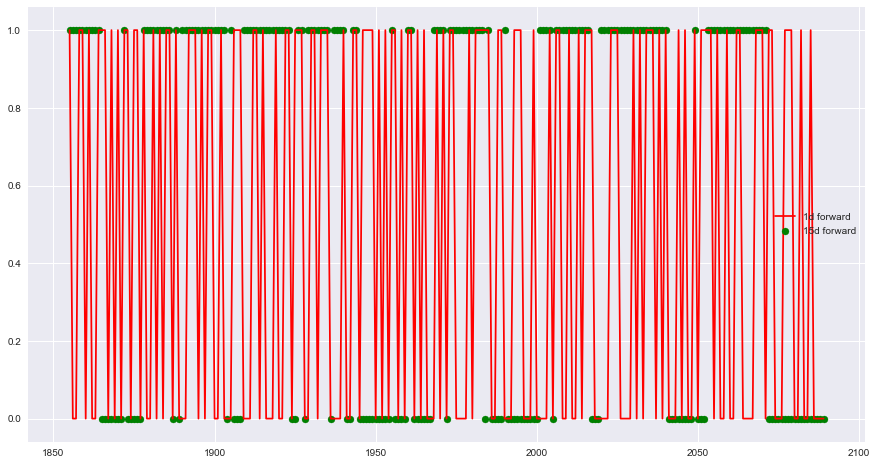

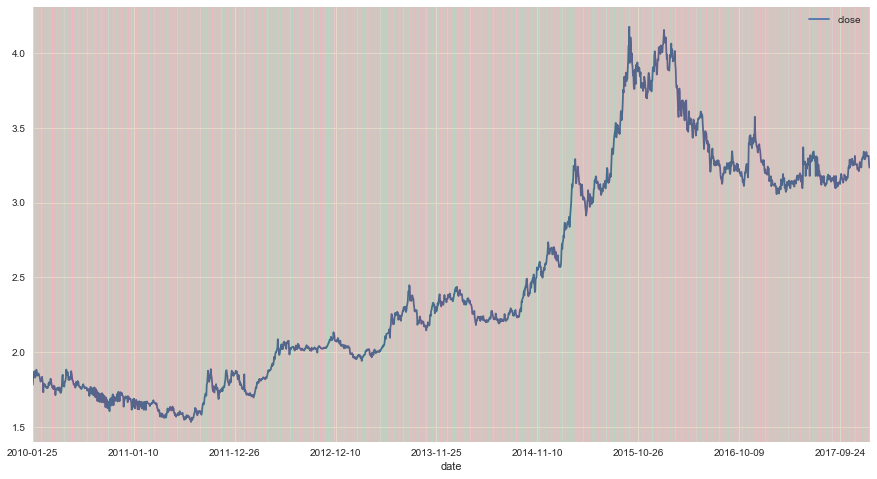

In [15]:
#Labeling the different window frames
##Signaling the difference between a feature datapoint and the previous/next one
       
def labelwf(dataframe, wf):
    for i in wf:
        swf = str(i)
        dataframe['label' + swf] = \
        (dataframe['close'] - dataframe['close'].shift(i))/dataframe['close'].shift(i)
        dataframe['label' + swf] = dataframe['label' + swf].apply(lambda x:1 if x>0.0 else 0)
    return dataframe
    
#Negative for looking future datapoints
#Positive for looking backwards
window_frames = [-1, -2, -15, 1, 2, 15]
labeled_data = labelwf(data.copy(), window_frames)
index = list(range(len(data)))
index = index[-250:-15]
label1 = labeled_data['label-1'].values
label1 = label1[-250:-15]
label15 = labeled_data['label-15'].values
label15 = label15[-250:-15]
c1 = copy['close_1_r'].apply(lambda x:0 if x>0.000 else 1)
c15 = copy['close_15_r'].apply(lambda x:0 if x>0.000 else 1)
y_5 = copy['close_5_r'].apply(lambda x:0 if x>0.000 else 1)
y_10 = copy['close_10_r'].apply(lambda x:0 if x>0.000 else 1)
y_30 = copy['close_30_r'].applu(lambda x:0 if x>0.000 else 1)
index = list(range(len(c1)))
index = index[-250:-15]

fig, ax = plt.subplots(figsize=(15, 8), sharey=True)
ax.plot(index, c1[-250:-15], label='1d forward', color='r')
ax.scatter(index, c15[-250:-15], label='15d forward', color='g')
ax.legend()


labeled_data['index'] = list(range(len(data)))
data.plot(y='close', figsize=(15, 8))
for r in labeled_data.iterrows():
    if r[1]['label1'] == 1:
        plt.axvline(x=r[1]['index'], linewidth=0.3, alpha=0.3, color='g')
    else:
        plt.axvline(x=r[1]['index'], linewidth=0.3, alpha=0.3, color='r')
    
plt.show()


###### Percentage change of each indicator : (xn - xn-1)/xn-1 where n = [n, n+y, n+2y] and y = Time Frame Window selected

,open,high,low,close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_-1_s,...,change_mdi_14,change_mdi,change_dx_14,change_dx,change_dx_6_ema,change_adx,change_adx_6_ema,change_adxr,change_trix,change_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,3.3075,3.3117,3.3075,3.3076,3.296855,0.029485,3.296855,3.355825,3.237885,3.3111,...,-0.073114,-0.073114,-6.225712e-16,-6.225712e-16,0.047143,0.047143,-0.009660,-0.009660,-0.034542,0.016791
2018-01-02,3.3108,3.3127,3.2585,3.3110,3.300275,0.026696,3.300275,3.353666,3.246884,3.3076,...,0.695512,0.695512,1.310292e+00,1.310292e+00,0.448662,0.448662,0.118096,0.118096,-0.044511,0.007815
2018-01-03,3.2574,3.2638,3.2410,3.2578,3.301150,0.024849,3.301150,3.350849,3.251451,3.3110,...,-0.015868,-0.015868,1.234280e-01,1.234280e-01,0.283790,0.283790,0.177938,0.177938,-0.126147,-0.007375
2018-01-04,3.2356,3.2410,3.2214,3.2355,3.301210,0.024680,3.301210,3.350571,3.251849,3.2578,...,0.066333,0.066333,1.039332e-01,1.039332e-01,0.204003,0.204003,0.188197,0.188197,-0.228872,-0.030493
2018-01-05,3.2328,3.2479,3.2256,3.2331,3.298505,0.028901,3.298505,3.356306,3.240704,3.2355,...,-0.105324,-0.105324,-1.462284e-01,-1.462284e-01,0.061550,0.061550,0.137684,0.137684,-0.352545,-0.063682


,change_open,change_high,change_low,change_close,change_close_20_sma,change_close_20_mstd,change_boll,change_boll_ub,change_boll_lb,change_close_-1_s,...,change_mdi_14,change_mdi,change_dx_14,change_dx,change_dx_6_ema,change_adx,change_adx_6_ema,change_adxr,change_trix,change_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,-0.001057,-0.000151,0.007770,-0.001057,0.000762,-0.037582,0.000762,0.000062,0.001489,-0.000664,...,-0.073114,-0.073114,-6.225712e-16,-6.225712e-16,0.047143,0.047143,-0.009660,-0.009660,-0.034542,0.016791
2018-01-02,0.000998,0.000302,-0.014815,0.001028,0.001037,-0.094602,0.001037,-0.000643,0.002779,-0.001057,...,0.695512,0.695512,1.310292e+00,1.310292e+00,0.448662,0.448662,0.118096,0.118096,-0.044511,0.007815
2018-01-03,-0.016129,-0.014761,-0.005371,-0.016068,0.000265,-0.069161,0.000265,-0.000840,0.001407,0.001028,...,-0.015868,-0.015868,1.234280e-01,1.234280e-01,0.283790,0.283790,0.177938,0.177938,-0.126147,-0.007375
2018-01-04,-0.006692,-0.006986,-0.006048,-0.006845,0.000018,-0.006802,0.000018,-0.000083,0.000122,-0.016068,...,0.066333,0.066333,1.039332e-01,1.039332e-01,0.204003,0.204003,0.188197,0.188197,-0.228872,-0.030493
2018-01-05,-0.000865,0.002129,0.001304,-0.000742,-0.000819,0.170995,-0.000819,0.001712,-0.003427,-0.006845,...,-0.105324,-0.105324,-1.462284e-01,-1.462284e-01,0.061550,0.061550,0.137684,0.137684,-0.352545,-0.063682


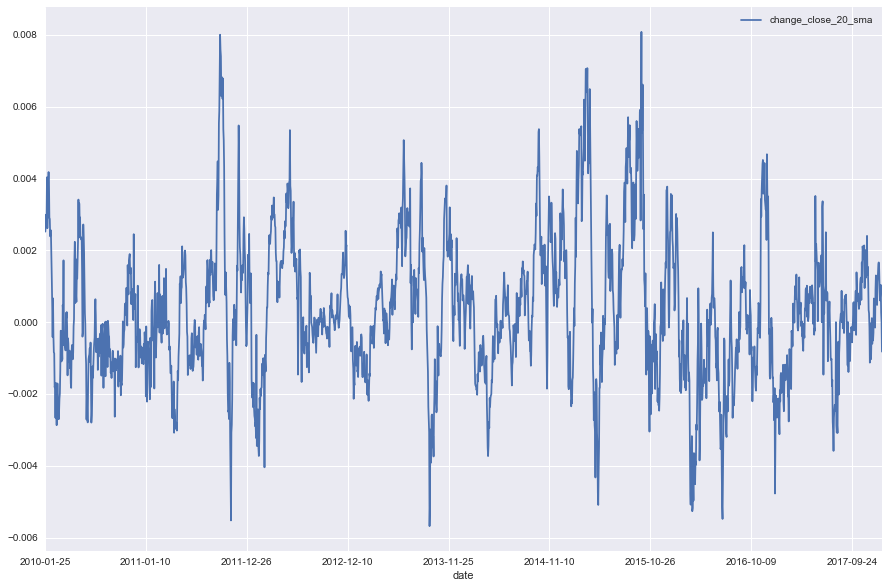

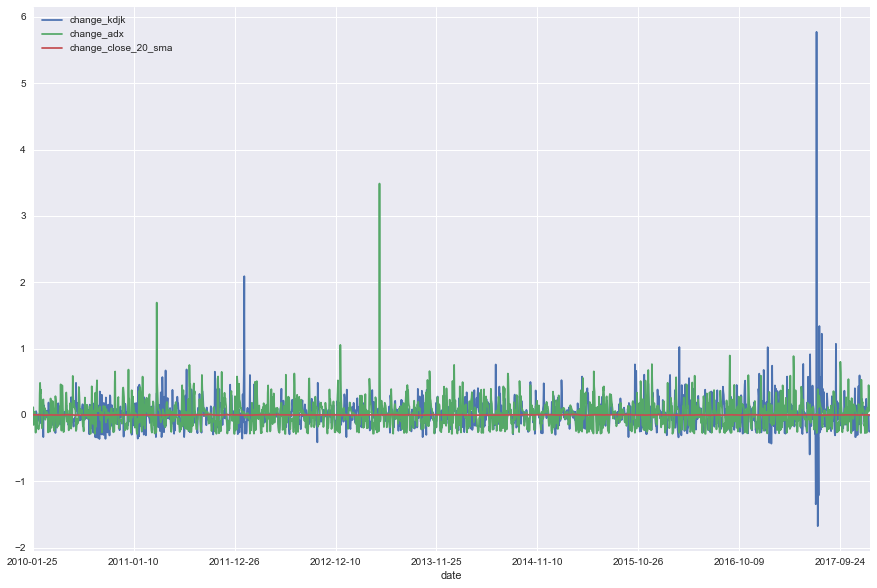

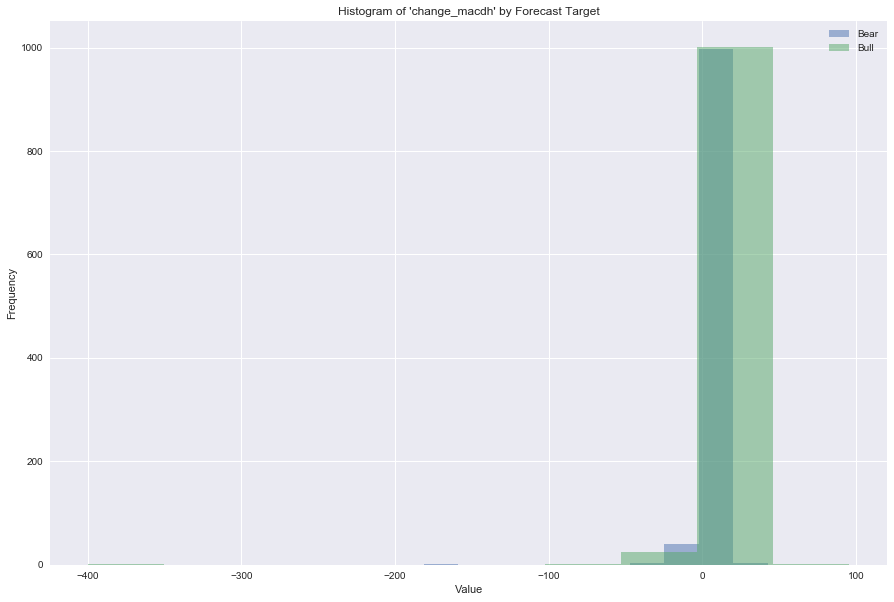

In [21]:
#Normalizing the features datapoints 
#Accordingly to its window frame

#Each datapoint to the change percentage of timeframe
def percent_change(dataframe, wf):
    new = pd.DataFrame()
    swf = str(wf)
    for feature in dataframe:
        if 'label' in str(dataframe[feature].name):
            pass
        elif 'change_' in str(dataframe[feature].name):
            pass
        else:
            dataframe['change_' + str(dataframe[feature].name)] = \
            (dataframe[feature] - dataframe[feature].shift(wf))/dataframe[feature].shift(wf)
            new['change_' + str(dataframe[feature].name)] = \
            (dataframe[feature] - dataframe[feature].shift(wf))/dataframe[feature].shift(wf)
    return dataframe, new

raw_data = data.copy()
data, percent_change_data = percent_change(data, 1)
data = data.drop('change_pdm', 1)
data = data.drop('change_um', 1)
data = data.drop('change_dm', 1)
percent_change_data = percent_change_data.drop('change_pdm', 1)
percent_change_data = percent_change_data.drop('change_um', 1)
percent_change_data = percent_change_data.drop('change_dm', 1)
percent_change_data = percent_change_data.replace([np.inf, -np.inf], np.nan)
percent_change_data = percent_change_data.fillna(method='bfill')
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(method='bfill')
data.plot(x=data.index, y='change_close_20_sma', figsize=(15,10))
data.plot(x=data.index, y=['change_kdjk','change_adx', 'change_close_20_sma'], figsize=(15,10))
                          
display(data.tail())
display(percent_change_data.tail())
plot_histogram_dv(data['change_macdh'], y1)
plot_histogram_dv(data['change_macdh'], c15)

#### We see in the above picture that even with the percent change ratio we cant diferentiate on how much that change was significant by some orders of magnitude

###### Standardized change range : ((xn - xn-1)/xn-1) / (xMax - xMin)

,open,high,low,close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_-1_s,...,rchange_mdi_14,rchange_mdi,rchange_dx_14,rchange_dx,rchange_dx_6_ema,rchange_adx,rchange_adx_6_ema,rchange_adxr,rchange_trix,rchange_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,3.3075,3.3117,3.3075,3.3076,3.296855,0.029485,3.296855,3.355825,3.237885,3.3111,...,-0.010609,-0.010609,-2.072037e-19,-2.072037e-19,0.012496,0.012496,-0.015652,-0.015652,-0.000204,0.000091
2018-01-02,3.3108,3.3127,3.2585,3.3110,3.300275,0.026696,3.300275,3.353666,3.246884,3.3076,...,0.100917,0.100917,4.360903e-04,4.360903e-04,0.118926,0.118926,0.191346,0.191346,-0.000263,0.000042
2018-01-03,3.2574,3.2638,3.2410,3.2578,3.301150,0.024849,3.301150,3.350849,3.251451,3.3110,...,-0.002302,-0.002302,4.107921e-05,4.107921e-05,0.075224,0.075224,0.288305,0.288305,-0.000745,-0.000040
2018-01-04,3.2356,3.2410,3.2214,3.2355,3.301210,0.024680,3.301210,3.350571,3.251849,3.2578,...,0.009625,0.009625,3.459096e-05,3.459096e-05,0.054075,0.054075,0.304928,0.304928,-0.001352,-0.000165
2018-01-05,3.2328,3.2479,3.2256,3.2331,3.298505,0.028901,3.298505,3.356306,3.240704,3.2355,...,-0.015282,-0.015282,-4.866762e-05,-4.866762e-05,0.016315,0.016315,0.223084,0.223084,-0.002083,-0.000345


,rchange_open,rchange_high,rchange_low,rchange_close,rchange_close_20_sma,rchange_close_20_mstd,rchange_boll,rchange_boll_ub,rchange_boll_lb,rchange_close_-1_s,...,rchange_mdi_14,rchange_mdi,rchange_dx_14,rchange_dx,rchange_dx_6_ema,rchange_adx,rchange_adx_6_ema,rchange_adxr,rchange_trix,rchange_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,-0.006705,-0.000915,0.065792,-0.007716,0.055369,-0.022755,0.055369,0.001321,0.041792,-0.004847,...,-0.010609,-0.010609,-2.072037e-19,-2.072037e-19,0.012496,0.012496,-0.015652,-0.015652,-0.000204,0.000091
2018-01-02,0.006329,0.001830,-0.125450,0.007503,0.075386,-0.057278,0.075386,-0.013763,0.078024,-0.007716,...,0.100917,0.100917,4.360903e-04,4.360903e-04,0.118926,0.118926,0.191346,0.191346,-0.000263,0.000042
2018-01-03,-0.102309,-0.089450,-0.045477,-0.117284,0.019267,-0.041874,0.019267,-0.017975,0.039494,0.007503,...,-0.002302,-0.002302,4.107921e-05,4.107921e-05,0.075224,0.075224,0.288305,0.288305,-0.000745,-0.000040
2018-01-04,-0.042451,-0.042332,-0.051209,-0.049965,0.001321,-0.004119,0.001321,-0.001775,0.003437,-0.117284,...,0.009625,0.009625,3.459096e-05,3.459096e-05,0.054075,0.054075,0.304928,0.304928,-0.001352,-0.000165
2018-01-05,-0.005489,0.012901,0.011040,-0.005414,-0.059547,0.103531,-0.059547,0.036623,-0.096222,-0.049965,...,-0.015282,-0.015282,-4.866762e-05,-4.866762e-05,0.016315,0.016315,0.223084,0.223084,-0.002083,-0.000345


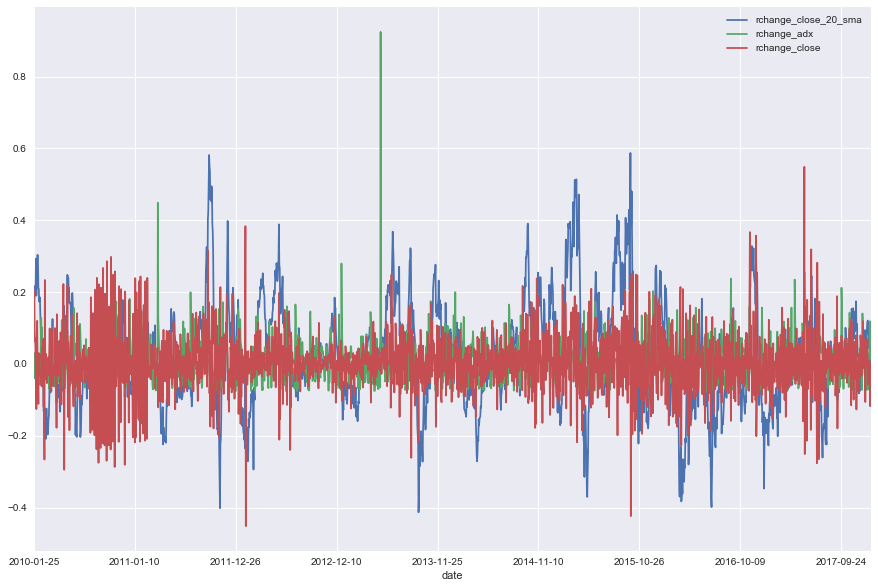

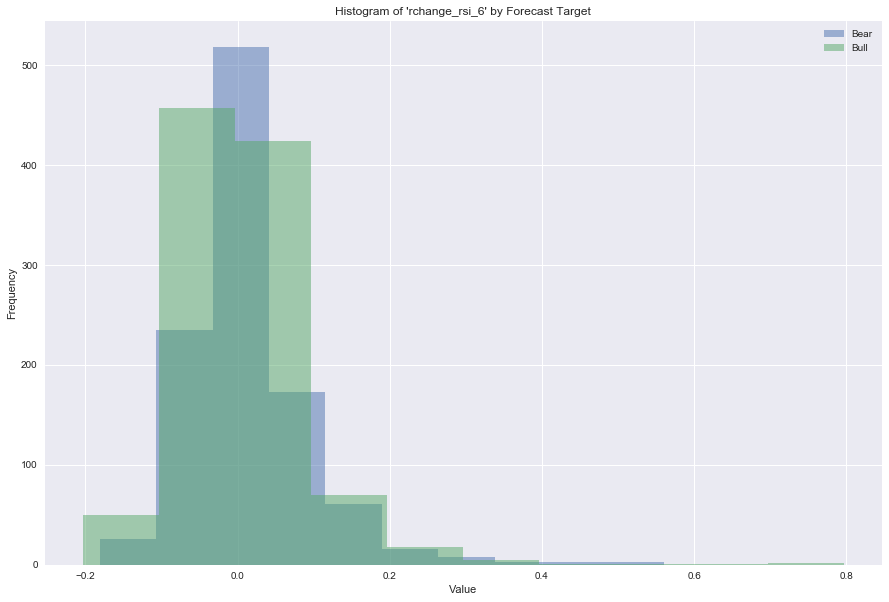

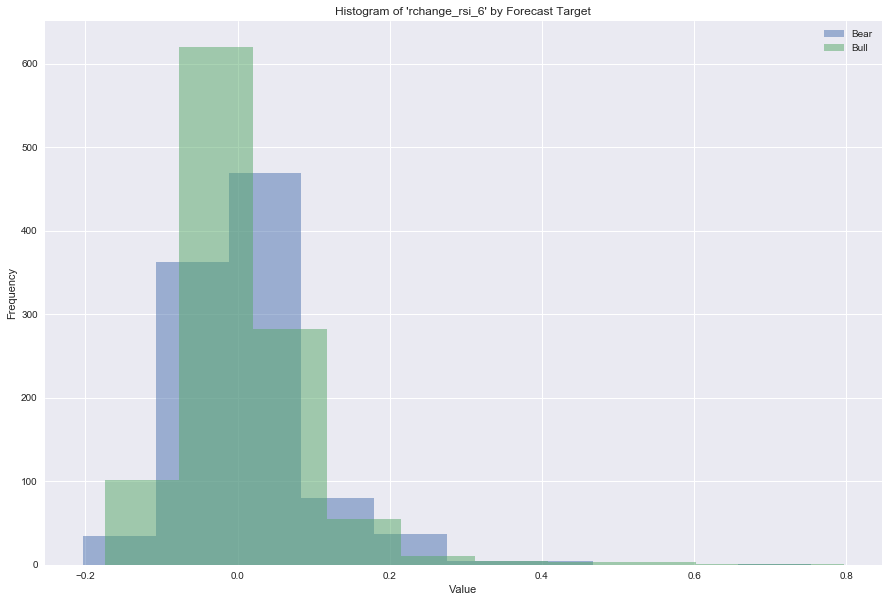

In [35]:
#How abnormal was the change compared to the feature range
def normalized_range(dataframe, wf):
    swf = str(wf)
    new = pd.DataFrame()
    for feature in dataframe:
        if 'label' in str(dataframe[feature].name):
            pass
        elif 'change_' in str(dataframe[feature].name):
            pass
        elif 'rchange_' in str(dataframe[feature].name):
            pass
        else:
            try:
                range = dataframe['change_' + str(dataframe[feature].name)].max() - \
                                              dataframe['change_' + str(dataframe[feature].name)].min()
                dataframe['rchange_' + str(dataframe[feature].name)] = \
                                              dataframe['change_' + str(dataframe[feature].name)] / range
                new['rchange_' + str(dataframe[feature].name)] = \
                                              dataframe['change_' + str(dataframe[feature].name)] / range
            except:
                pass
    return dataframe, new
                                              

change_data = data.copy()
data, normalized_range_data = normalized_range(data, 1)
data.plot(x=data.index, y=['rchange_close_20_sma','rchange_adx', 'rchange_close'], figsize=(15,10))
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(method='bfill')
normalized_range_data = normalized_range_data.replace([np.inf, -np.inf], np.nan)
normalized_range_data = normalized_range_data.fillna(method='bfill')


display(data.tail())
display(normalized_range_data.tail())
plot_histogram_dv(normalized_range_data['rchange_rsi_6'], y1)    
plot_histogram_dv(normalized_range_data['rchange_rsi_6'], c15) 

#### As we can see, the datapoints are now expressing in a much more intuiteve manner their movements with a same axis of change

###### Normalized change rate : ( ( (xn - xn-1)/xn-1 ) - (Σxi / n) ) / ( √( (Σxi - (Σxi / n)ˆ2 ) / n ) ) = (Change - Mean) / Standard Deviation

,open,high,low,close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_-1_s,...,nchange_mdi_14,nchange_mdi,nchange_dx_14,nchange_dx,nchange_dx_6_ema,nchange_adx,nchange_adx_6_ema,nchange_adxr,nchange_trix,nchange_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,3.3075,3.3117,3.3075,3.3076,3.296855,0.029485,3.296855,3.355825,3.237885,3.3111,...,-0.277020,-0.277020,-0.045644,-0.045644,0.134691,0.134691,-0.148862,-0.148862,0.007774,0.020925
2018-01-02,3.3108,3.3127,3.2585,3.3110,3.300275,0.026696,3.300275,3.353666,3.246884,3.3076,...,1.612389,1.612389,-0.026412,-0.026412,2.033934,2.033934,1.249729,1.249729,0.004729,0.018454
2018-01-03,3.2574,3.2638,3.2410,3.2578,3.301150,0.024849,3.301150,3.350849,3.251451,3.3110,...,-0.136300,-0.136300,-0.043832,-0.043832,1.254066,1.254066,1.904840,1.904840,-0.020209,0.014271
2018-01-04,3.2356,3.2410,3.2214,3.2355,3.301210,0.024680,3.301210,3.350571,3.251849,3.2578,...,0.065763,0.065763,-0.044118,-0.044118,0.876665,0.876665,2.017157,2.017157,-0.051589,0.007907
2018-01-05,3.2328,3.2479,3.2256,3.2331,3.298505,0.028901,3.298505,3.356306,3.240704,3.2355,...,-0.356199,-0.356199,-0.047790,-0.047790,0.202839,0.202839,1.464168,1.464168,-0.089369,-0.001231


,nchange_open,nchange_high,nchange_low,nchange_close,nchange_close_20_sma,nchange_close_20_mstd,nchange_boll,nchange_boll_ub,nchange_boll_lb,nchange_close_-1_s,...,nchange_mdi_14,nchange_mdi,nchange_dx_14,nchange_dx,nchange_dx_6_ema,nchange_adx,nchange_adx_6_ema,nchange_adxr,nchange_trix,nchange_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,-0.128347,-0.050057,0.821339,-0.127259,0.229905,-0.441805,0.229905,-0.071889,0.362274,-0.089153,...,-0.277020,-0.277020,-0.045644,-0.045644,0.134691,0.134691,-0.148862,-0.148862,0.007774,0.020925
2018-01-02,0.061175,-0.003072,-1.676715,0.059701,0.368936,-1.041422,0.368936,-0.279976,0.760588,-0.124398,...,1.612389,1.612389,-0.026412,-0.026412,2.033934,2.033934,1.249729,1.249729,0.004729,0.018454
2018-01-03,-1.518482,-1.565728,-0.632093,-1.473256,-0.020851,-0.773884,-0.020851,-0.338086,0.337015,0.062559,...,-0.136300,-0.136300,-0.043832,-0.043832,1.254066,1.254066,1.904840,1.904840,-0.020209,0.014271
2018-01-04,-0.648116,-0.759089,-0.706970,-0.646273,-0.145504,-0.118126,-0.145504,-0.114609,-0.059371,-1.470369,...,0.065763,0.065763,-0.044118,-0.044118,0.876665,0.876665,2.017157,2.017157,-0.051589,0.007907
2018-01-05,-0.110665,0.186461,0.106153,-0.098988,-0.568277,1.751577,-0.568277,0.415113,-1.154962,-0.643402,...,-0.356199,-0.356199,-0.047790,-0.047790,0.202839,0.202839,1.464168,1.464168,-0.089369,-0.001231


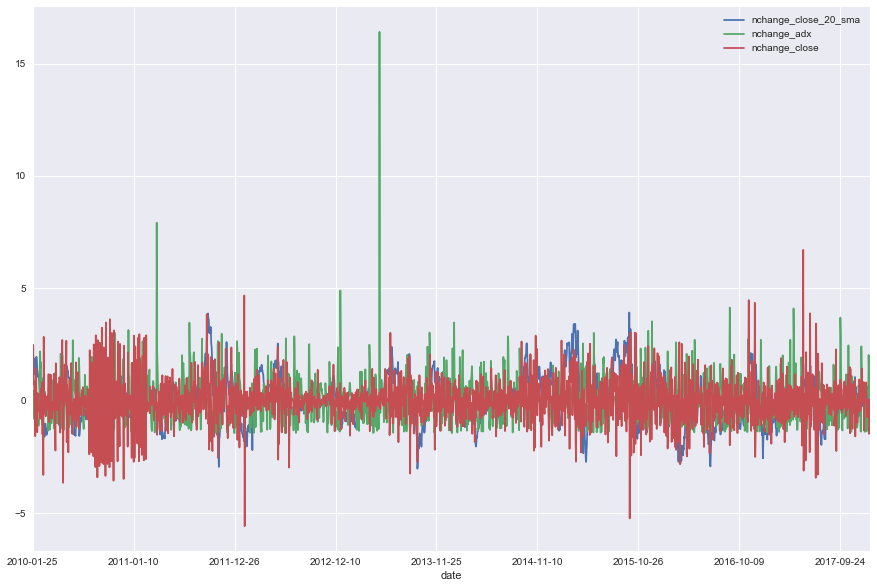

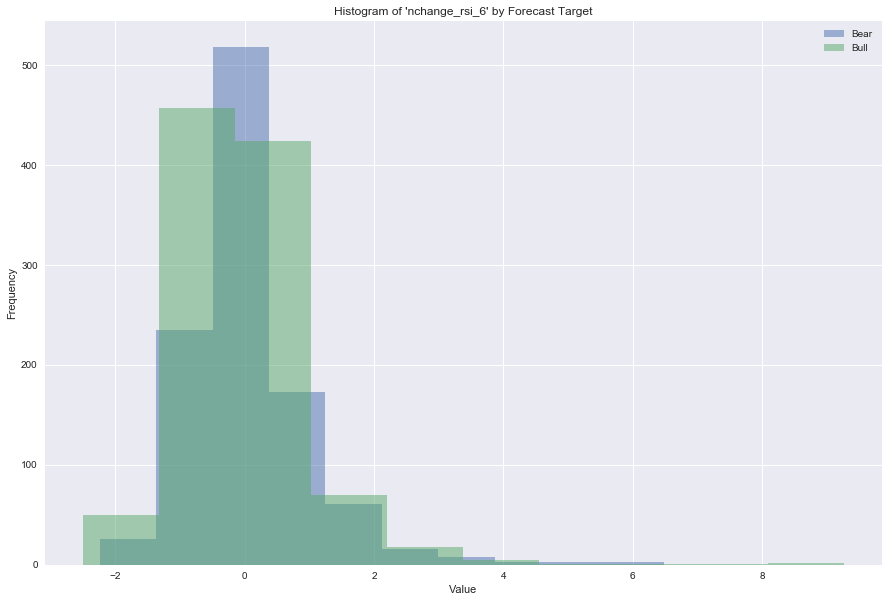

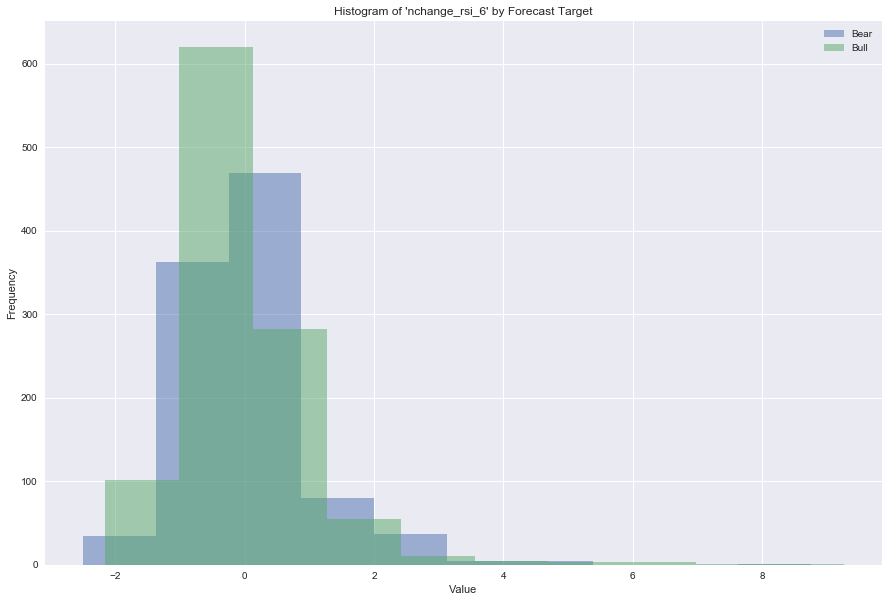

In [43]:
#How abnormal was this change percentage ratio in comparison to the others
def normalized_change(dataframe, wf):
    swf = str(wf)
    new = pd.DataFrame()
    for feature in dataframe:
        if 'label' in str(dataframe[feature].name):
            pass
        elif 'change_' in str(dataframe[feature].name):
            pass
        elif 'rchange_' in str(dataframe[feature].name):
            pass
        elif 'nchange_' in str(dataframe[feature].name):
            pass
        else:
            try:
                std = dataframe['change_' + str(dataframe[feature].name)].std()
                mean = dataframe['change_' + str(dataframe[feature].name)].mean()
                dataframe['nchange_' + str(dataframe[feature].name)] = \
                (dataframe['change_' + str(dataframe[feature].name)] - mean)/std
                new['nchange_' + str(dataframe[feature].name)] = \
                (dataframe['change_' + str(dataframe[feature].name)] - mean)/std
            except:
                pass
            
    return dataframe, new

rchange_data = data.copy()
data, normalized_change_data = normalized_change(data, 1)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(method='bfill')
normalized_change_data = normalized_change_data.replace([np.inf, -np.inf], np.nan)
normalized_change_data = normalized_change_data.fillna(method='bfill')
data.plot(x=data.index, y=['nchange_close_20_sma','nchange_adx', 'nchange_close'], figsize=(15, 10))
                          
display(data.tail())
display(normalized_change_data.tail())

plot_histogram_dv(normalized_change_data['nchange_rsi_6'], y1)    
plot_histogram_dv(normalized_change_data['nchange_rsi_6'], c15)    


###### And now, we can evaluate the order of the anomaly of a certain datapoint without losing information on the feature

###### Normalizing the raw features instead of the change rate

,open,high,low,close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_-1_s,...,distance_mdi_14,distance_mdi,distance_dx_14,distance_dx,distance_dx_6_ema,distance_adx,distance_adx_6_ema,distance_adxr,distance_trix,distance_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,3.3075,3.3117,3.3075,3.3076,3.296855,0.029485,3.296855,3.355825,3.237885,3.3111,...,0.488966,0.488966,-0.348806,-0.348806,-0.616822,-0.616822,-0.665492,-0.665492,0.338169,0.335080
2018-01-02,3.3108,3.3127,3.2585,3.3110,3.300275,0.026696,3.300275,3.353666,3.246884,3.3076,...,2.302947,2.302947,1.064375,1.064375,-0.031028,-0.031028,-0.485673,-0.485673,0.314458,0.339260
2018-01-03,3.2574,3.2638,3.2410,3.2578,3.301150,0.024849,3.301150,3.350849,3.251451,3.3110,...,2.232778,2.232778,1.371921,1.371921,0.505743,0.505743,-0.182739,-0.182739,0.250250,0.335284
2018-01-04,3.2356,3.2410,3.2214,3.2355,3.301210,0.024680,3.301210,3.350571,3.251849,3.2578,...,2.521454,2.521454,1.662856,1.662856,1.001106,1.001106,0.194673,0.194673,0.148451,0.318967
2018-01-05,3.2328,3.2479,3.2256,3.2331,3.298505,0.028901,3.298505,3.356306,3.240704,3.2355,...,2.032685,2.032685,1.210983,1.210983,1.181051,1.181051,0.522749,0.522749,0.027533,0.285929


,distance_open,distance_high,distance_low,distance_close,distance_close_20_sma,distance_close_20_mstd,distance_boll,distance_boll_ub,distance_boll_lb,distance_close_-1_s,...,distance_mdi_14,distance_mdi,distance_dx_14,distance_dx,distance_dx_6_ema,distance_adx,distance_adx_6_ema,distance_adxr,distance_trix,distance_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1.129346,1.105120,1.161948,1.130977,1.128932,-0.326446,1.128932,1.056927,1.203622,1.136831,...,0.488966,0.488966,-0.348806,-0.348806,-0.616822,-0.616822,-0.665492,-0.665492,0.338169,0.335080
2018-01-02,1.133888,1.106495,1.093890,1.135696,1.133691,-0.433323,1.133691,1.054054,1.216700,1.131972,...,2.302947,2.302947,1.064375,1.064375,-0.031028,-0.031028,-0.485673,-0.485673,0.314458,0.339260
2018-01-03,1.060385,1.039224,1.069584,1.061854,1.134909,-0.504066,1.134909,1.050304,1.223338,1.136692,...,2.232778,2.232778,1.371921,1.371921,0.505743,0.505743,-0.182739,-0.182739,0.250250,0.335284
2018-01-04,1.030377,1.007858,1.042361,1.030902,1.134993,-0.510543,1.134993,1.049934,1.223916,1.062847,...,2.521454,2.521454,1.662856,1.662856,1.001106,1.001106,0.194673,0.194673,0.148451,0.318967
2018-01-05,1.026523,1.017350,1.048194,1.027570,1.131228,-0.348840,1.131228,1.057567,1.207719,1.031893,...,2.032685,2.032685,1.210983,1.210983,1.181051,1.181051,0.522749,0.522749,0.027533,0.285929


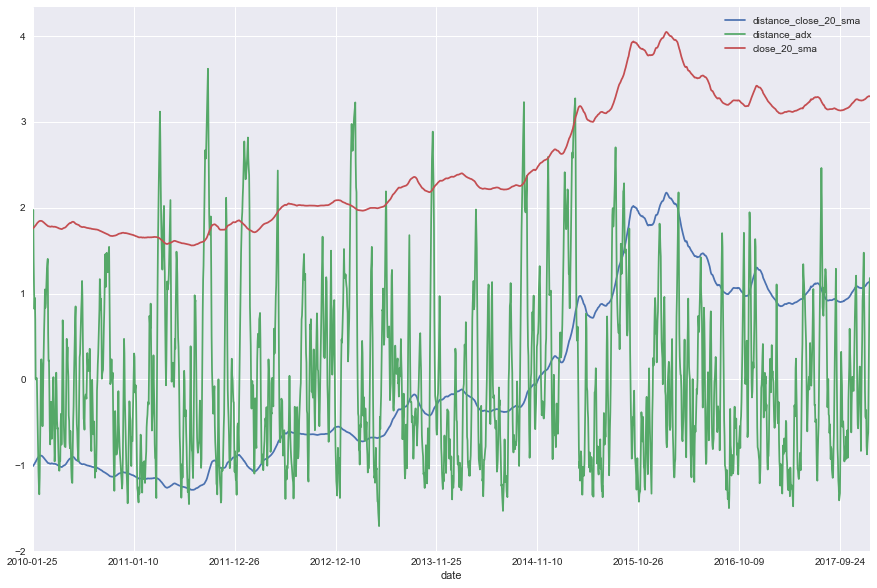

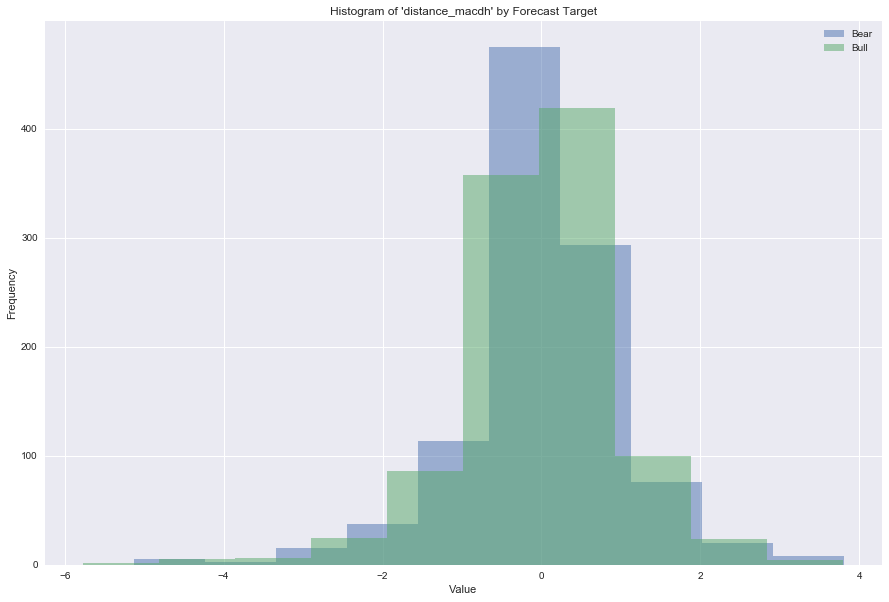

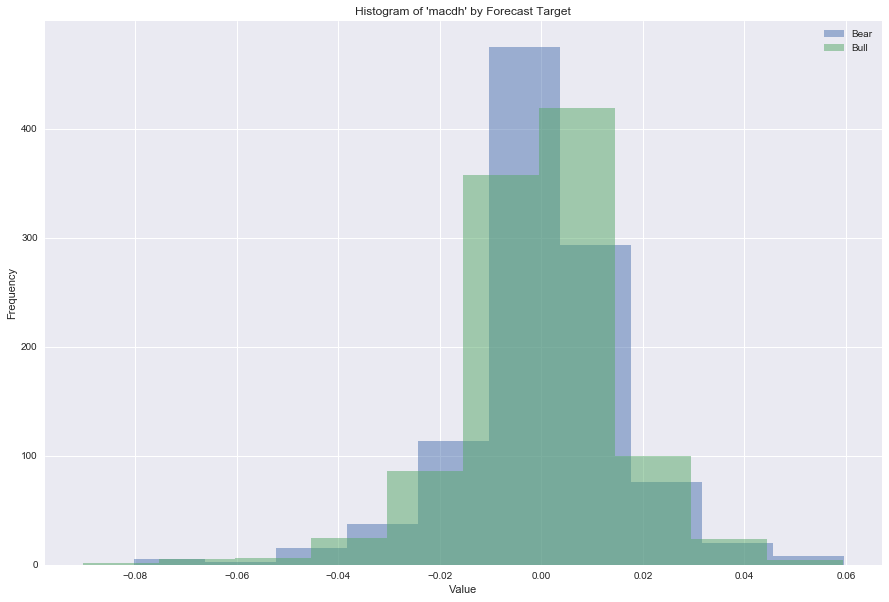

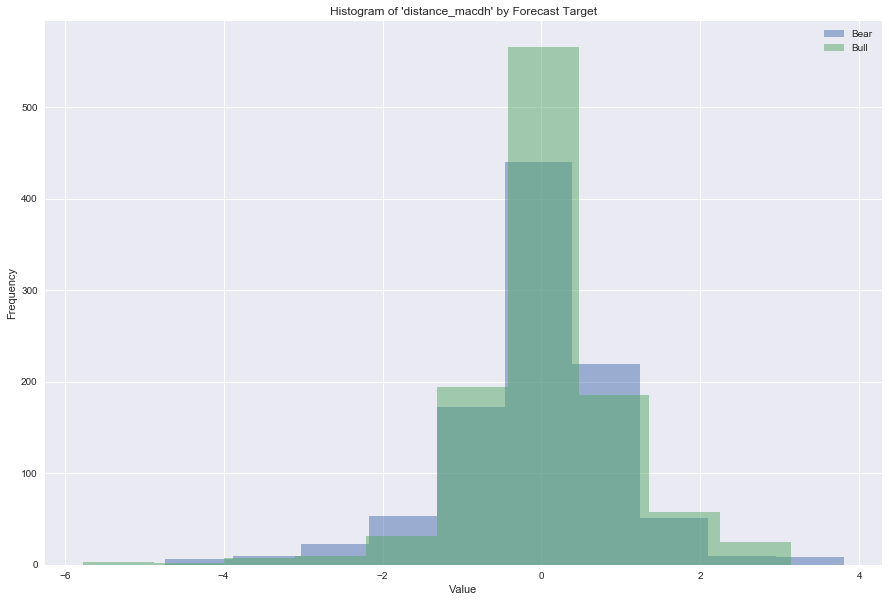

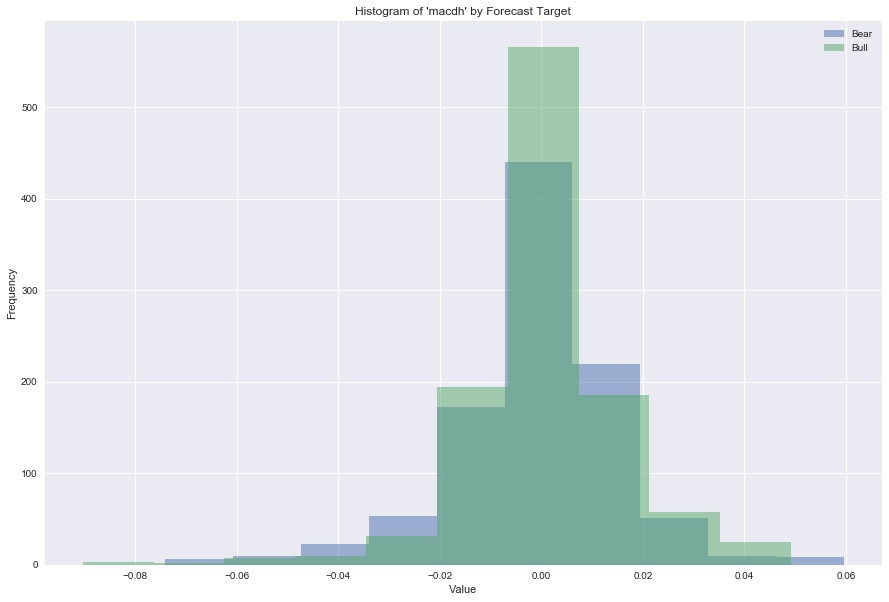

In [46]:
#How abnormal is the position that the datapoint is located at
#We substitute the original feature value for this one
def distance(dataframe):
    new = pd.DataFrame()
    for feature in dataframe:
        if 'label' in str(dataframe[feature].name):
            pass
        elif 'change_' in str(dataframe[feature].name):
            pass
        elif 'nchange_' in str(dataframe[feature].name):
            pass
        elif 'rchange_' in str(dataframe[feature].name):
            pass
        elif 'distance_' in str(dataframe[feature].name):
            pass
        else:
            std = dataframe[feature].std()
            mean = dataframe[feature].mean()
            dataframe['distance_' + str(dataframe[feature].name)] = (dataframe[feature] - mean)/std 
            new['distance_' + str(dataframe[feature].name)] = (dataframe[feature] - mean)/std 
    return dataframe, new

nchange = data.copy()
data, distance_data = distance(data)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(method='bfill')
distance_data = distance_data.replace([np.inf, -np.inf], np.nan)
distance_data = distance_data.fillna(method='bfill')
data.plot(x=data.index, y=['distance_close_20_sma','distance_adx', 'close_20_sma'], figsize=(15,10))


display(data.tail())
display(distance_data.tail())

plot_histogram_dv(distance_data['distance_macdh'], y1)
plot_histogram_dv(data['macdh'], y1)    
plot_histogram_dv(distance_data['distance_macdh'], c15)
plot_histogram_dv(data['macdh'], c15)

#### And evaluate the distance of the datapoint address in comparison to the others of its kind

###### Creating new features via interactions between them

In [98]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

In [99]:
teste = add_interactions(data.copy())
print (teste.head(5))

     open    high     low   close  close_20_sma  close_20_mstd      boll  \
0  1.8189  1.8213  1.7655  1.7835      1.758200       0.028923  1.758200   
1  1.8136  1.8460  1.8129  1.8336      1.762635       0.033447  1.762635   
2  1.7860  1.8663  1.7860  1.8496      1.767467       0.038380  1.767467   
3  1.8064  1.8712  1.8064  1.8680      1.772758       0.043854  1.772758   
4  1.8200  1.8729  1.8200  1.8729      1.777765       0.048201  1.777765   

    boll_ub   boll_lb  close_-1_s                ...                  \
0  1.816046  1.700354      1.8188                ...                   
1  1.829528  1.695742      1.7835                ...                   
2  1.844227  1.690707      1.8336                ...                   
3  1.860465  1.685051      1.8496                ...                   
4  1.874167  1.681363      1.8680                ...                   

   distance_adx_distance_adx_6_ema  distance_adx_distance_adxr  \
0                         2.155962          

## Feature Selection

###### The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

29


Index([u'distance_open', u'distance_high', u'distance_low', u'distance_close',
       u'distance_close_20_sma', u'distance_close_20_mstd', u'distance_boll',
       u'distance_boll_ub', u'distance_boll_lb', u'distance_close_-1_s',
       u'distance_close_26_ema', u'distance_macd', u'distance_middle',
       u'distance_cr-ma1', u'distance_cr-ma3', u'distance_open_2_sma',
       u'distance_middle_14_sma', u'distance_middle_20_sma', u'distance_atr',
       u'distance_close_10_sma', u'distance_close_50_sma', u'distance_dma',
       u'distance_atr_14', u'distance_dx_14', u'distance_dx',
       u'distance_dx_6_ema', u'distance_adx', u'distance_trix',
       u'distance_trix_9_sma'],
      dtype='object')

,value
distance_open,0.440642
distance_high,0.443556
distance_low,0.505598
distance_close,0.468534
distance_close_20_sma,0.491667


                           value
distance_open           0.440642
distance_high           0.443556
distance_low            0.505598
distance_close          0.468534
distance_close_20_sma   0.491667
distance_close_20_mstd  0.217032
distance_boll           0.494343
distance_boll_ub        0.829823
distance_boll_lb        0.555011
distance_close_-1_s     0.442161
distance_close_26_ema   0.729244
distance_macd           0.168234
distance_middle         0.637619
distance_cr-ma1         0.207764
distance_cr-ma3         0.198476
distance_open_2_sma     0.450697
distance_middle_14_sma  0.642620
distance_middle_20_sma  0.506292
distance_atr            0.241409
distance_close_10_sma   0.624836
distance_close_50_sma   1.000000
distance_dma            0.172680
distance_atr_14         0.246042
distance_dx_14          0.185833
distance_dx             0.173521
distance_dx_6_ema       0.113376
distance_adx            0.113376
distance_trix           0.319277
distance_trix_9_sma     0.260197


24
Index

,value
distance_open,0.191533
distance_high,0.181462
distance_low,0.210108
distance_close,0.138125
distance_boll_lb,0.141074


                           value
distance_open           0.191533
distance_high           0.181462
distance_low            0.210108
distance_close          0.138125
distance_boll_lb        0.141074
distance_close_-1_s     0.141206
distance_close_-1_d     0.740016
distance_close_-1_r     0.530851
distance_middle         0.174595
distance_cr-ma3         0.211435
distance_rsv_9          0.249812
distance_kdjk_9         0.276445
distance_kdjk           0.276445
distance_kdjj_9         0.714550
distance_kdjj           0.714550
distance_open_2_sma     0.184072
distance_wr_10          0.488122
distance_middle_14_sma  0.110842
distance_close_10_sma   0.116276
distance_pdm_14_ema     0.299721
distance_pdm_14         0.299721
distance_adx_6_ema      0.506360
distance_adxr           0.506360
distance_trix_9_sma     0.250674




['distance_open',
 'distance_high',
 'distance_low',
 'distance_close',
 'distance_boll_lb',
 'distance_close_-1_s',
 'distance_middle',
 'distance_cr-ma3',
 'distance_open_2_sma',
 'distance_middle_14_sma',
 'distance_close_10_sma',
 'distance_trix_9_sma']

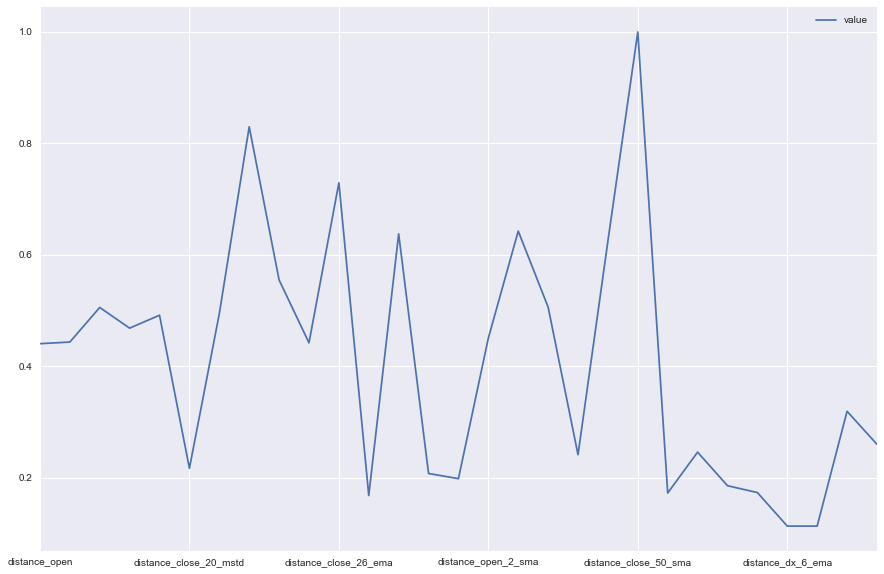

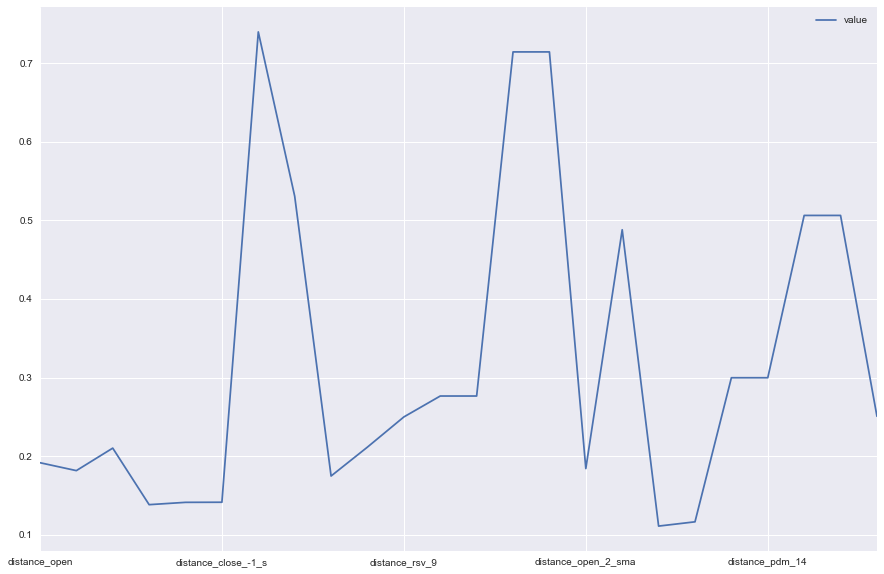

In [129]:
import numpy as np
from sklearn.feature_selection import f_classif, mutual_info_classif

y_15 = c15[15:-15]
y_1 = c1[15:-15]
y_5 = y_5[15:-15]
y_30 = y_30[15:-15]
mi = mutual_info_regression(distance_data, y_15, discrete_features='auto')
#print test.columns
mi /= np.max(mi)
result = distance_data.columns[mi > 0.1]
miresult = result
mi = mi[mi > 0.1]
print len(result)
display(result)
mi_df = pd.DataFrame(index=result, columns=['value'])
mi_df['value'] = mi
mi_df.plot(figsize=(15,10))
display(mi_df.head())
print mi_df

print "\n"

ftest, _ = f_regression(distance_data, y_15)
ftest /= np.max(ftest)
_[np.isnan(_)] = 0.0
f = _[~np.isnan(_)]
result = distance_data.columns[f > 0.1]
f = f[f > 0.1]
#print f.max()
#print result.max()
print len(result)
print result

f_df = pd.DataFrame(index=result, columns=['value'])
f_df['value'] = f
f_df.plot(figsize=(15,10))
display(f_df.head())
print f_df

equal = []

for i in miresult.values:
    if i in result.values:
        equal.append(i)
    
print "\n"
display(equal)



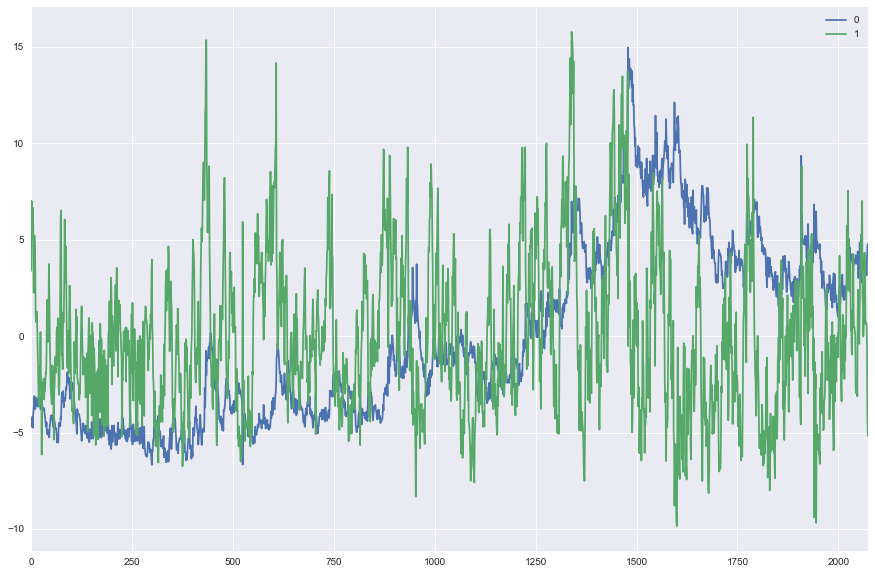

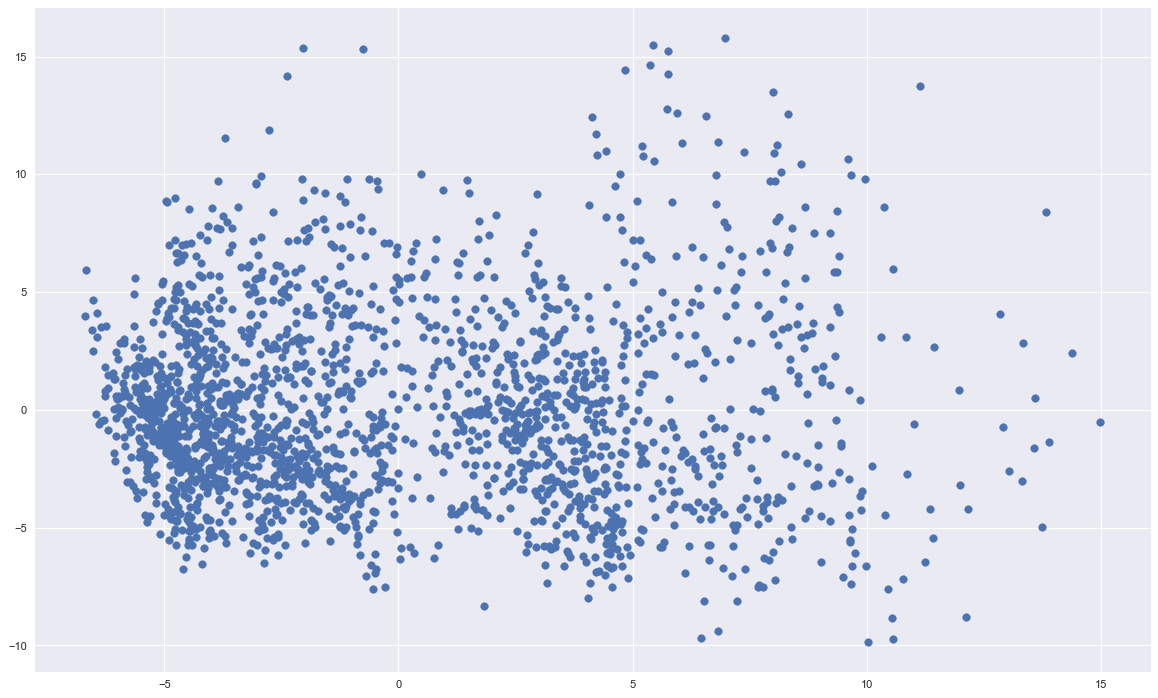

In [101]:
from sklearn.decomposition import PCA



pca = PCA(n_components=2)
data_pca = pd.DataFrame(pca.fit_transform(distance_data))
#display(data_pca.head())
data_pca.plot(figsize=(15,10))

datatest = pca.fit_transform(distance_data)
plt.figure(num=None, figsize=(18, 11), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(datatest[:, 0], datatest[:, 1])
plt.show()

###### T - Distributed Stochastic Neighboor Embedding
Transforming the data into a Similarity Matrix for comparing the similarity of a certain datapoint with the rest

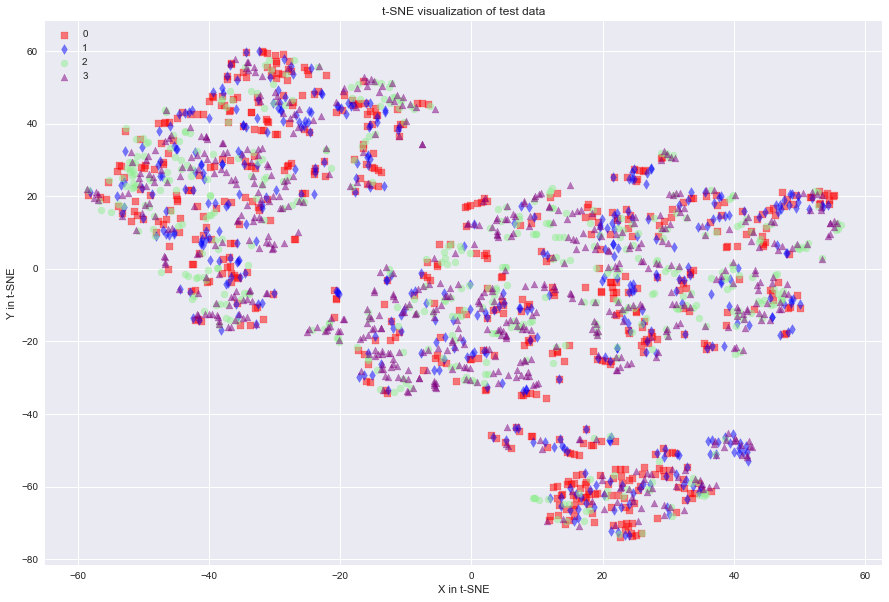

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# t-distributed Stochastic Neighbor Embedding (t-SNE) visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(distance_data)
#y_test = y_15

y_tsne = []
for key, i in np.ndenumerate(y_15):
    if i == 0:
        if y_1[key[0]] == 0:
            y_tsne.append(0)
        elif y_1[key[0]] == 1:
            y_tsne.append(1)
    if i == 1:
        if y_1[key[0]] == 0:
            y_tsne.append(2)
        elif y_1[key[0]] == 1:
            y_tsne.append(3)

y_test = np.array(y_tsne)
            

markers=('s', 'd', 'o', '^', 'v')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple'}
plt.figure(figsize=(15,10))
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl, alpha=0.5)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()



# Facebook Time series forecasting

###### Prophet library

,open,high,low,close,adj close,volume,ds,y
Date,,,,,,,,
2018-02-05,3.2169,3.2455,3.2138,3.2154,3.2154,0.0,2018-02-05,1.167952
2018-02-06,3.2611,3.2759,3.2175,3.2611,3.2611,0.0,2018-02-06,1.182065
2018-02-07,3.2333,3.2630,3.2314,3.2334,3.2334,0.0,2018-02-07,1.173534
2018-02-08,3.2696,3.2926,3.2562,3.2699,3.2699,0.0,2018-02-08,1.184759
2018-02-09,3.2844,3.3075,3.2708,3.2846,3.2846,0.0,2018-02-09,1.189245


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Library/Python/2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


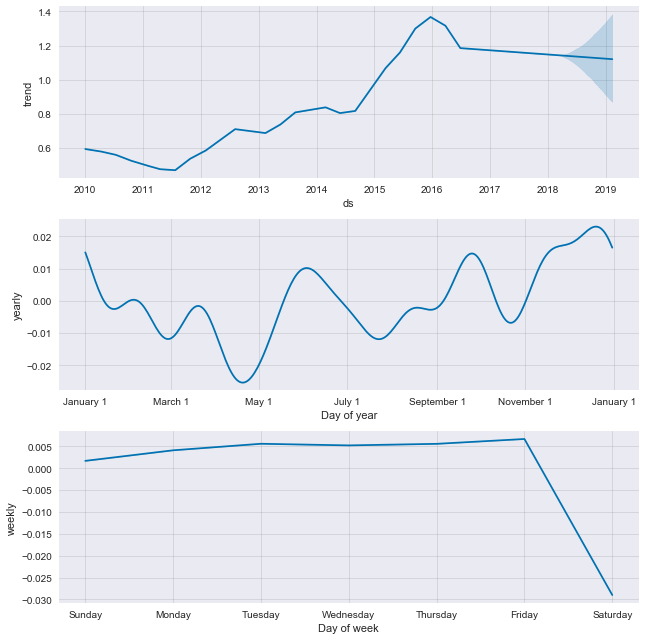

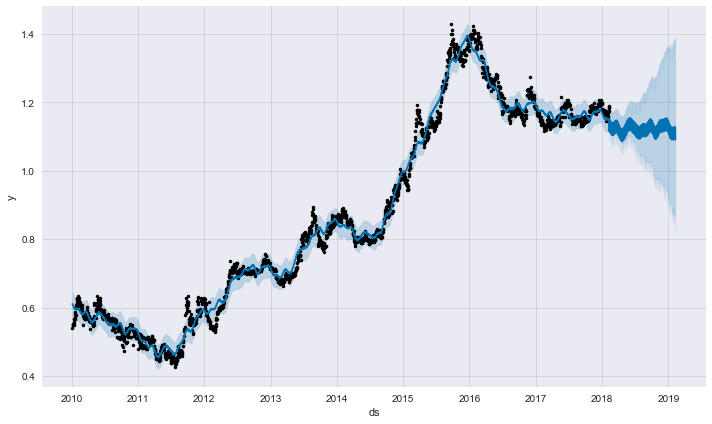

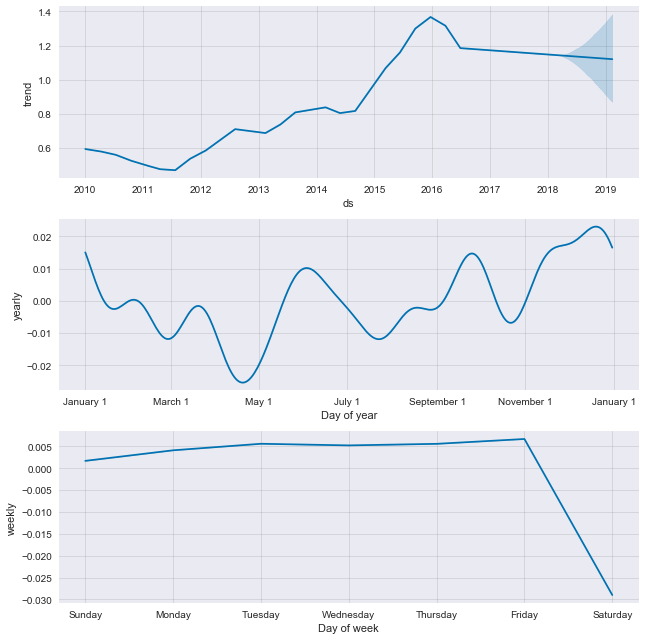

In [2]:
from fbprophet import Prophet
import numpy as np

test = data.copy()
test['ds'] = data.index
test['y'] = np.log(data['close'])
display(test.tail())
m = Prophet()
m.fit(test)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
m.plot(forecast)
m.plot_components(forecast)